<a href="https://colab.research.google.com/github/bnubald/EQ-live/blob/master/Tutorials/3_Constructing_orthogonal_polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constructing orthogonal polynomials
-------------------------------------

In this tutorial we describe how one can construct orthogonal polynomials in Effective Quadratures. For starters, we consider Legendre polynomials — orthogonal with respect to the uniform weight function. We define a Parameter $s$ with $\rho(s) \sim \mathcal{U}[-1,\ 1]$.

In [0]:
#_______________________________________________________________________
# Initial check to see if in Google Colab environment
import sys
IN_COLAB = 'google.colab' in sys.modules

# Install effective-quadratures if in Google Colab environment
# and not already installed
if IN_COLAB and 'equadratures' not in sys.modules:
    !pip install equadratures

In [0]:
from equadratures import Parameter, Basis, Poly
import numpy as np
import matplotlib.pyplot as plt

order = 5
s1 = Parameter(lower=-1, upper=1, order=order, distribution='Uniform')

We restrict our attention to the first five orthogonal polynomials, where the parameterized matrix $P$ has the form

$$ P(i, j) = \psi_i\ (\lambda_j) \quad \text{where}\quad i = 1,...,p;\ j=1,...,N $$

where $N$ is the number of points $\lambda_j$ discretizing the domain of $s$, and $p$ is the maximum polynomial order, set to 5. Plots of the polynomials are shown below.

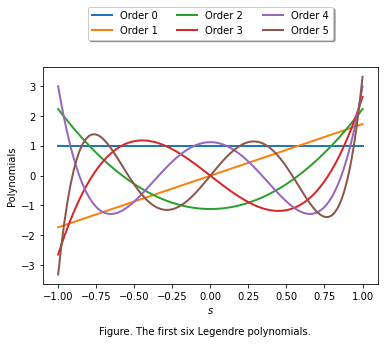

In [3]:
myBasis = Basis('univariate')
myPoly = Poly(s1, myBasis, method='numerical-integration')
xo = np.linspace(-1, 1, 100)
P = myPoly.get_poly(xo)

fig = plt.figure()
plt.plot(xo, P[0,:], lw=2, label='Order 0')
plt.plot(xo, P[1,:], lw=2, label='Order 1')
plt.plot(xo, P[2,:], lw=2, label='Order 2')
plt.plot(xo, P[3,:], lw=2, label='Order 3')
plt.plot(xo, P[4,:], lw=2, label='Order 4')
plt.plot(xo, P[5,:], lw=2, label='Order 5')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), ncol=3,
           fancybox=True, shadow=True)
plt.xlabel('$s$')
plt.ylabel('Polynomials')
caption = 'Figure. The first six Legendre polynomials.'
fig.text(0.5, -0.05, caption, ha='center');

A few remarks are in order regarding this plot. Standard Legendre polynomials are orthogonal via

$$ \int_{-1}^{1} \psi_i(s)\ \psi_j(s)\ ds = \frac{2\delta_{ij}}{2i+1}, $$

where $\delta_{ij}$ is the Kronecker delta. In Effective Quadratures, we modify all orthogonal polynomials such that the right hand side of this expression is unity when $i=j$

$$ \frac{1}{2i+1} \int_{-1}^{1} \psi_i(s)\ \psi_j(s)\ ds $$

$$ =\int_{-1}^{1} \frac{1}{\sqrt{2i+1}} \psi_j(s)\ \frac{1}{\sqrt{2j+1}} \psi_j(s)\ ds $$

$$ =\delta_{ij} $$

Introducing these scaling factors, we now can plot the standard Legendre polynomials; these are reported in the [Wikipedia entry](https://en.wikipedia.org/wiki/Legendre_polynomials).

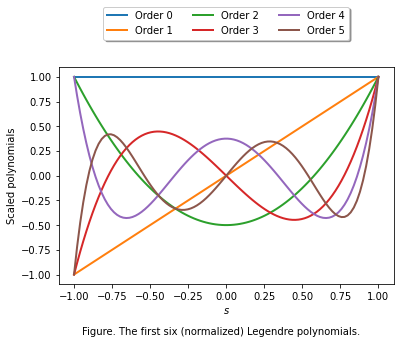

In [4]:
factor_0 = 1.0
factor_1 = 1.0 / np.sqrt(2.0 * 1.0 + 1.)
factor_2 = 1.0 / np.sqrt(2.0 * 2.0 + 1.)
factor_3 = 1.0 / np.sqrt(2.0 * 3.0 + 1.)
factor_4 = 1.0 / np.sqrt(2.0 * 4.0 + 1.)
factor_5 = 1.0 / np.sqrt(2.0 * 5.0 + 1.)

fig = plt.figure()
plt.plot(xo, factor_0 * P[0,:], lw=2, label='Order 0')
plt.plot(xo, factor_1 * P[1,:], lw=2, label='Order 1')
plt.plot(xo, factor_2 * P[2,:], lw=2, label='Order 2')
plt.plot(xo, factor_3 * P[3,:], lw=2, label='Order 3')
plt.plot(xo, factor_4 * P[4,:], lw=2, label='Order 4')
plt.plot(xo, factor_5 * P[5,:], lw=2, label='Order 5')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), ncol=3,
           fancybox=True, shadow=True)
plt.xlabel('$s$')
plt.ylabel('Scaled polynomials')
caption = 'Figure. The first six (normalized) Legendre polynomials.'
fig.text(0.5, -0.05, caption, ha='center');

The full source code for this tutorial can be found [here](https://github.com/Effective-Quadratures/Effective-Quadratures/blob/master/source/_documentation/codes/tutorial_3.py)